In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfm = pd.read_csv('train.csv')

In [3]:
dfm['Summary'] = dfm['Pastry'] + dfm['Z_Scratch'] + dfm['K_Scatch'] + dfm['Stains'] + dfm['Dirtiness'] + dfm['Bumps'] + dfm['Other_Faults']

In [4]:
df = dfm[dfm['Summary'] == 1]
df = df.drop(columns = ['Summary'])

In [5]:
df_o = df[df['Pixels_Areas'] > 28000]
len(df_o)

5

In [6]:
# Pixel Areas Outlier Removed
df = df[df['Pixels_Areas'] < 30000]

In [7]:
# X Perimeter Outlier Removed
df = df[df['X_Perimeter'] < 3000]

In [8]:
# Sum of Luminosity Outlier Removed
df = df[df['Sum_of_Luminosity'] < 1000000]

In [11]:
df =  df.drop(columns = ['Y_Minimum', 'Y_Maximum', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Empty_Index', 'Luminosity_Index'])

<Axes: >

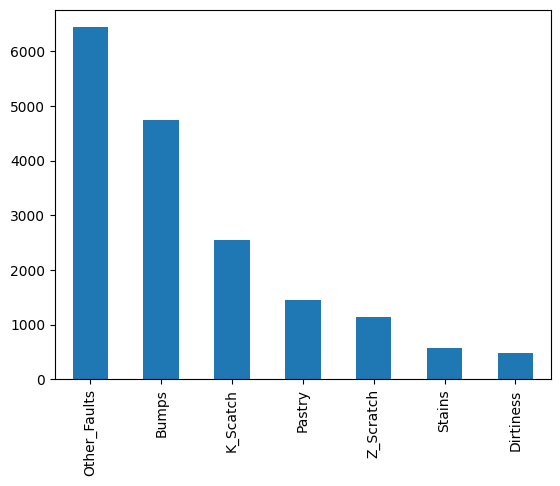

In [12]:
features = df.columns[:-7]
labels = df.columns[-7:]
X = df[features]
y = df[labels]
y.idxmax(axis=1).value_counts().plot(kind='bar')

In [13]:
# scikit-learn packages
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,chi2

In [18]:
s = MinMaxScaler()
data_s = s.fit_transform(df)
data_s = pd.DataFrame(data_s, columns=df.columns)

# Split data into X and y
features = df.columns[:-7]
labels = df.columns[-7:]
X = data_s[features]
y = data_s[labels]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 45)

In [19]:
import tensorflow as tf

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_dim = X_train.shape[1], activation = 'relu'), 
    tf.keras.layers.Dense(y_train.shape[1], activation='softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [21]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=1)

Epoch 1/20
348/348 [==============================] - 4s 4ms/step - loss: 1.4552 - accuracy: 0.4244 - val_loss: 1.2566 - val_accuracy: 0.4996
Epoch 2/20
348/348 [==============================] - 1s 3ms/step - loss: 1.2129 - accuracy: 0.5006 - val_loss: 1.1742 - val_accuracy: 0.4989
Epoch 3/20
348/348 [==============================] - 1s 2ms/step - loss: 1.1532 - accuracy: 0.5094 - val_loss: 1.1223 - val_accuracy: 0.5180
Epoch 4/20
348/348 [==============================] - 1s 3ms/step - loss: 1.1150 - accuracy: 0.5320 - val_loss: 1.0907 - val_accuracy: 0.5324
Epoch 5/20
348/348 [==============================] - 1s 3ms/step - loss: 1.0917 - accuracy: 0.5432 - val_loss: 1.0744 - val_accuracy: 0.5439
Epoch 6/20
348/348 [==============================] - 1s 3ms/step - loss: 1.0784 - accuracy: 0.5438 - val_loss: 1.0686 - val_accuracy: 0.5342
Epoch 7/20
348/348 [==============================] - 1s 3ms/step - loss: 1.0705 - accuracy: 0.5467 - val_loss: 1.0593 - val_accuracy: 0.5421
Epoch 

In [22]:
# Make predictions and save in dataframe
yp = model.predict(X_test)
yp = pd.DataFrame(yp,columns=ytest.columns)

# Extract predicted labels and probabilities
predicted_label = yp.idxmax(axis=1)
predicted_prob = yp.max(axis=1)
actual_label = y_test.idxmax(axis=1)

109/109 [==============================] - 0s 1ms/step


In [24]:
yp['Actual fault'] = actual_label.values
yp

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,Actual fault
0,0.045661,0.034656,0.088431,1.275463e-02,0.025051,0.398205,0.395241,Other_Faults
1,0.245439,0.016283,0.037299,4.651788e-08,0.262002,0.069867,0.369110,Dirtiness
2,0.254084,0.000334,0.001330,1.149242e-04,0.028489,0.128222,0.587425,Other_Faults
3,0.004157,0.021684,0.057055,1.517468e-03,0.005196,0.354609,0.555781,Other_Faults
4,0.135485,0.022825,0.103978,6.996741e-08,0.132990,0.088683,0.516040,Other_Faults
...,...,...,...,...,...,...,...,...
3468,0.015930,0.011593,0.060033,1.188243e-01,0.014877,0.281428,0.497315,K_Scatch
3469,0.169603,0.020264,0.009165,1.326996e-04,0.050568,0.181036,0.569232,Pastry
3470,0.182796,0.002432,0.000703,4.168545e-04,0.014417,0.417333,0.381903,Bumps
3471,0.098422,0.004925,0.000565,8.900506e-05,0.003279,0.517029,0.375690,Bumps


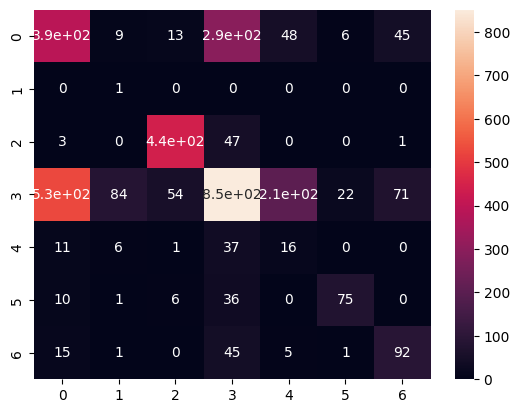

In [25]:
cm = confusion_matrix(predicted_label,actual_label)
sns.heatmap(cm,annot=True)
plt.show()

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rfc = RandomForestClassifier(random_state = 45)

param_grid_rfc = {
    'max_depth' : [5, 10, 15, 25],
    'n_estimators' : [50, 100, 250, 500],
    'min_samples_split' : [5, 10, 15, 20]
}

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
rfr_cv = GridSearchCV(rfc, param_grid_rfc, cv = 5, scoring = 'accuracy', n_jobs = -1)

In [31]:
rfr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=45), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 25],
                         'min_samples_split': [5, 10, 15, 20],
                         'n_estimators': [50, 100, 250, 500]},
             scoring='accuracy')

In [32]:
rfr_cv.best_params_

{'max_depth': 25, 'min_samples_split': 5, 'n_estimators': 50}

In [33]:
# Best parameters
rfr_f = RandomForestClassifier(max_depth= 25, min_samples_split=5, n_estimators = 50)
rfr_f.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, min_samples_split=5, n_estimators=50)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
y_pred = rfr_f.predict(X_test)
accuracy_score(y_test, y_pred)

0.36625395911315867

In [37]:
y_test

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
15107,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9600,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1098,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12168,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14402,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
4055,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7356,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4230,0.0,0.0,0.0,0.0,0.0,1.0,0.0
249,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
print(y_pred)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
